# Parameter estimation by optimization
## How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array `nohitter_times`.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call $τ$, the typical interval time. The value of the parameter $τ$ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use `np.random.exponential()` to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as `np`, `pd`, `plt`, and `sns`, respectively.

### Instructions:
* Seed the random number generator with `42`.
* Compute the mean time (in units of number of games) between no-hitters.
* Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
* Plot the theoretical PDF using `plt.hist()`. Remember to use keyword arguments `bins=50`, `normed=True`, and `histtype='step'`. Be sure to label your axes.
* Show your plot.

In [1]:
# Import modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()

In [2]:
def ecdf(data):
    return np.sort(data), np.arange(1, len(data)+1) / len(data)

df = pd.read_csv('../_datasets/mlb_nohitters.csv')
t = np.concatenate(((0,), np.diff(df.game_number))).astype(int) - 1
df['time_interval'] = t
nohitter_times = df[df.date>19010000]['time_interval'].values

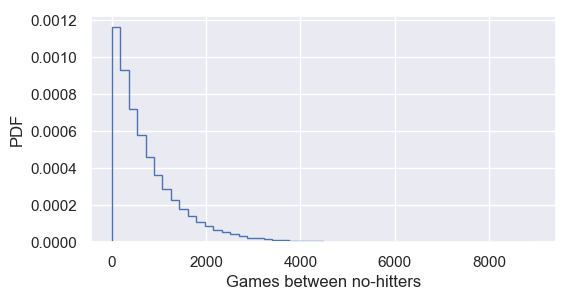

In [3]:
plt.figure(figsize=(6,3), dpi=100)

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

## 2. Do the data follow our story?
You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

### Instructions:
* Compute an ECDF from the actual time between no-hitters (`nohitter_times`). Use the `ecdf()` function you wrote in the prequel course.
* Create a CDF from the theoretical samples you took in the last exercise (`inter_nohitter_time`).
* Plot `x_theor` and `y_theor` as a line using `plt.plot()`. Then overlay the ECDF of the real data `x` and `y` as points. To do this, you have to specify the keyword arguments `marker = '.'` and `linestyle = 'none'` in addition to `x` and `y` inside `plt.plot()`.
* Set a 2% margin on the plot.
* Show the plot.

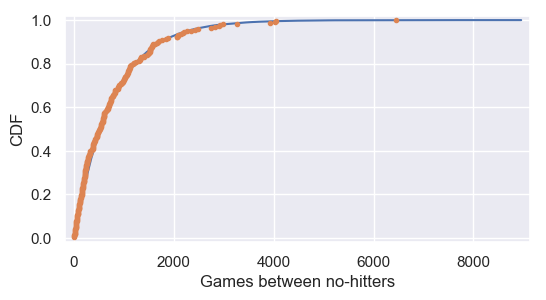

In [6]:
plt.figure(figsize=(6,3), dpi=100)

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

## 3. How is this parameter optimal?
Now sample out of an exponential distribution with $τ$ being twice as large as the optimal $τ$. Do it again for $τ$ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the $τ$ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

_Note_: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.

### Instructions:
* Take `10000` samples out of an Exponential distribution with parameter $τ_{1/2}$ = `tau/2`.
* Take `10000` samples out of an Exponential distribution with parameter $τ_{2}$ = `2*tau`.
* Generate CDFs from these two sets of samples using your `ecdf()` function.
* Add these two CDFs as lines to your plot. This has been done for you, so hit 'Submit Answer' to view the plot!

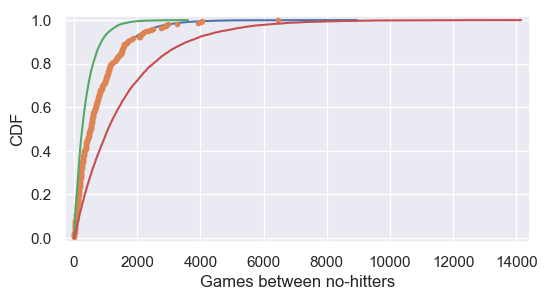

In [7]:
plt.figure(figsize=(6,3), dpi=100)

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2* tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.